Current working directory: c:\Users\vumma\Documents\boosting_from_scratch_project\notebooks
sys.path BEFORE append: ['c:\\Users\\vumma\\Documents\\boosting_from_scratch_project\\notebooks', 'c:\\Users\\vumma\\anaconda3\\python312.zip', 'c:\\Users\\vumma\\anaconda3\\DLLs', 'c:\\Users\\vumma\\anaconda3\\Lib', 'c:\\Users\\vumma\\anaconda3', '', 'c:\\Users\\vumma\\anaconda3\\Lib\\site-packages', 'c:\\Users\\vumma\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\vumma\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\vumma\\anaconda3\\Lib\\site-packages\\Pythonwin', '../', '../', '../']
sys.path AFTER append: ['c:\\Users\\vumma\\Documents\\boosting_from_scratch_project\\notebooks', 'c:\\Users\\vumma\\anaconda3\\python312.zip', 'c:\\Users\\vumma\\anaconda3\\DLLs', 'c:\\Users\\vumma\\anaconda3\\Lib', 'c:\\Users\\vumma\\anaconda3', '', 'c:\\Users\\vumma\\anaconda3\\Lib\\site-packages', 'c:\\Users\\vumma\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\vumma\\anaconda3\\Lib\\site-p

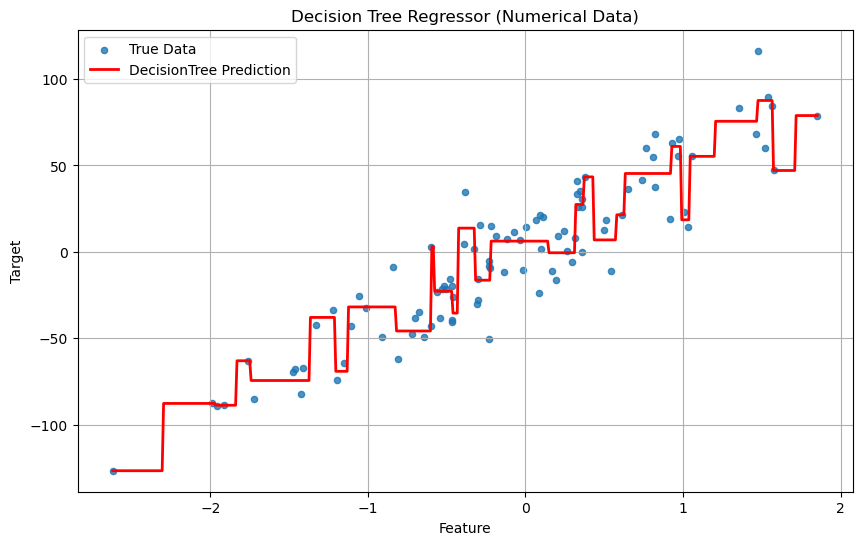

DecisionTree Regressor MSE on training data: 136.81

--- Testing DecisionTree Classifier (Numerical Data) ---
  Building node at depth 0. Samples: 100, Unique Y: [0 1]
  Trying to find best split for node with 100 samples.
    Checking feature 0 (is numerical: True). Unique values: [-0.85852241 -0.77719676 -0.40020814 -0.22595246 -0.21198653 -0.08239154
 -0.00832267  0.01258051  0.09145925  0.094903    0.10320711  0.12437227
  0.15559223  0.22485502  0.24802757  0.33958117  0.37705866  0.37878997
  0.3808594   0.46010921  0.47335819  0.48727907  0.51142713  0.53358465
  0.55656344  0.57357881  0.57885884  0.58590018  0.59137345  0.60046915
  0.63356167  0.63944087  0.64569333  0.67963113  0.69840909  0.7114472
  0.7314302   0.73254597  0.73375167  0.73455812  0.73902766  0.76361798
  0.76916909  0.77018374  0.78779153  0.80375081  0.85095512  0.87717639
  0.87971932  0.88259274  1.00183089  1.00459142  1.01215141  1.03307436
  1.04031359  1.04578316  1.04598687  1.07746664  1.09821151 

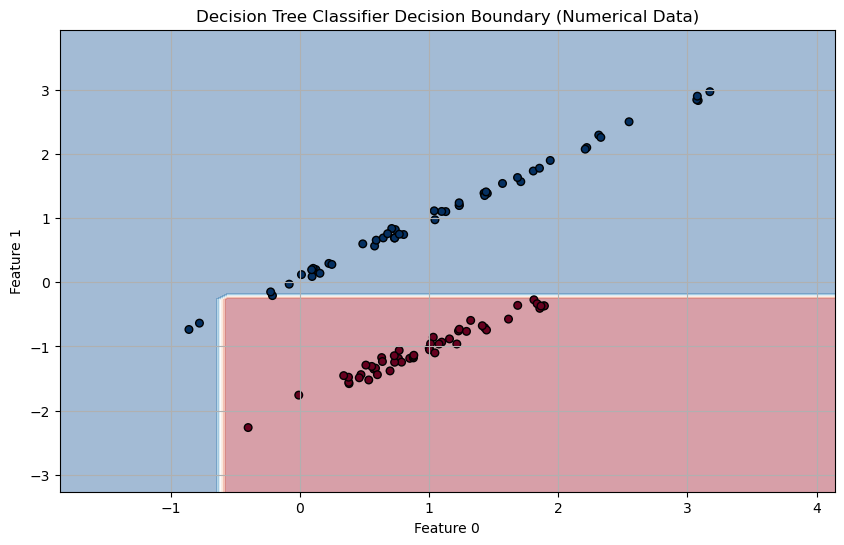


--- Testing DecisionTree with Mixed (Numerical + Categorical) Data ---
  Building node at depth 0. Samples: 20, Unique Y: [0 1]
  Trying to find best split for node with 20 samples.
    Checking feature 0 (is numerical: True). Unique values: [10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0 65.0 70.0 75.0
 80.0 85.0 90.0 95.0 100.0 105.0]
      Num Split: Feat 0, Thresh 12.50, Gain 0.0263
      Num Split: Feat 0, Thresh 17.50, Gain 0.0000
      Num Split: Feat 0, Thresh 22.50, Gain 0.0098
      Num Split: Feat 0, Thresh 27.50, Gain 0.0000
      Num Split: Feat 0, Thresh 32.50, Gain 0.0067
      Num Split: Feat 0, Thresh 37.50, Gain 0.0000
      Num Split: Feat 0, Thresh 42.50, Gain 0.0055
      Num Split: Feat 0, Thresh 47.50, Gain 0.0000
      Num Split: Feat 0, Thresh 52.50, Gain 0.0051
      Num Split: Feat 0, Thresh 57.50, Gain 0.0000
      Num Split: Feat 0, Thresh 62.50, Gain 0.0051
      Num Split: Feat 0, Thresh 67.50, Gain 0.0000
      Num Split: Feat 0, Thresh 72.50, G

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
import pandas as pd 
import os 

import sys

print(f"Current working directory: {os.getcwd()}")
print(f"sys.path BEFORE append: {sys.path}")
sys.path.append('../') 
print(f"sys.path AFTER append: {sys.path}")


from boosting_from_scratch.tree import DecisionTree


print("\n--- Testing DecisionTree Regressor (Numerical Data) ---")

X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_reg = X_reg.reshape(-1, 1) # Ensure X is 2D

X_test_reg = np.linspace(X_reg.min(), X_reg.max(), 500).reshape(-1, 1)


my_regressor_feature_types = ['numerical']


reg_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='regressor',
                        feature_types=my_regressor_feature_types) # NOW PASSING FEATURE_TYPES
reg_tree.fit(X_reg, y_reg)

y_pred_reg = reg_tree.predict(X_reg)
y_pred_test_reg = reg_tree.predict(X_test_reg)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, alpha=0.8, label='True Data')
plt.plot(X_test_reg, y_pred_test_reg, color='red', linestyle='-', linewidth=2, label='DecisionTree Prediction')
plt.title('Decision Tree Regressor (Numerical Data)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


mse = np.mean((y_reg - y_pred_reg)**2)
print(f"DecisionTree Regressor MSE on training data: {mse:.2f}")


print("\n--- Testing DecisionTree Classifier (Numerical Data) ---")


X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                       n_clusters_per_class=1, random_state=42)

my_classifier_feature_types = ['numerical', 'numerical']


clf_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='classifier',
                        feature_types=my_classifier_feature_types) # NOW PASSING FEATURE_TYPES
clf_tree.fit(X_clf, y_clf)

y_pred_clf = clf_tree.predict(X_clf)
accuracy = np.mean(y_pred_clf == y_clf)
print(f"DecisionTree Classifier Accuracy on training data: {accuracy:.2f}")


x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=30, edgecolor='k', cmap=plt.cm.RdBu)
plt.title('Decision Tree Classifier Decision Boundary (Numerical Data)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()


print("\n--- Testing DecisionTree with Mixed (Numerical + Categorical) Data ---")

# 1. Generate simple toy data with one numerical and one categorical feature
# Use a NumPy array directly, ensuring `object` dtype for categorical column
X_mixed_direct = np.array([
    [10.0, 'A'], [20.0, 'B'], [30.0, 'A'], [40.0, 'C'], [50.0, 'B'],
    [60.0, 'A'], [70.0, 'C'], [80.0, 'B'], [90.0, 'A'], [100.0, 'C'],
    [15.0, 'B'], [25.0, 'A'], [35.0, 'C'], [45.0, 'B'], [55.0, 'A'],
    [65.0, 'C'], [75.0, 'B'], [85.0, 'A'], [95.0, 'C'], [105.0, 'B']
], dtype=object) # Force dtype=object so _is_numerical check treats it as non-numerical

y_mixed_direct = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                            1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=np.int32)

# Define feature types for this mixed dataset:
# Feature 0 (index 0) is numerical, Feature 1 (index 1) is categorical
my_mixed_feature_types = ['numerical', 'categorical']

# Instantiate and fit DecisionTree Classifier for mixed data
categorical_clf_tree = DecisionTree(max_depth=3, min_samples_split=2, tree_type='classifier',
                                    feature_types=my_mixed_feature_types) # NOW PASSING FEATURE_TYPES
categorical_clf_tree.fit(X_mixed_direct, y_mixed_direct)

# Make predictions and calculate accuracy
y_pred_categorical = categorical_clf_tree.predict(X_mixed_direct)
accuracy_categorical = np.mean(y_pred_categorical == y_mixed_direct)
print(f"DecisionTree Classifier (Mixed Data) Accuracy on training data: {accuracy_categorical:.2f}")

# Note: Complex visualization for mixed data is harder, focus on accuracy for now.

In [6]:
# notebooks/demo.ipynb (in a new cell)

print("\n--- Testing Loss Functions (MSELoss & LogLoss) ---")

# Import your Loss classes
from boosting_from_scratch.loss import MSELoss, LogLoss, sigmoid

# --- Test MSELoss ---
print("\n--- MSELoss Test ---")
y_true_reg = np.array([10.0, 20.0, 30.0, 40.0, 50.0])
y_pred_reg = np.array([11.0, 19.0, 32.0, 38.0, 49.0])

mse_loss_fn = MSELoss()
loss_mse = mse_loss_fn.loss(y_true_reg, y_pred_reg)
grad_mse = mse_loss_fn.gradient(y_true_reg, y_pred_reg)
hess_mse = mse_loss_fn.hessian(y_true_reg, y_pred_reg)

print(f"y_true (Regression): {y_true_reg}")
print(f"y_pred (Regression): {y_pred_reg}")
print(f"MSE Loss: {loss_mse:.4f}")
print(f"MSE Gradient: {grad_mse}")
print(f"MSE Hessian: {hess_mse}")
# Expected gradient: y_pred - y_true = [1. -1.  2. -2. -1.]
# Expected hessian: [1. 1. 1. 1. 1.]

# --- Test LogLoss ---
print("\n--- LogLoss Test ---")
y_true_clf = np.array([0, 1, 0, 1, 0]) # Binary true labels
y_pred_raw_clf = np.array([-1.0, 2.0, -0.5, 1.5, 0.0]) # Raw predictions (log-odds)

log_loss_fn = LogLoss()
loss_log = log_loss_fn.loss(y_true_clf, y_pred_raw_clf)
grad_log = log_loss_fn.gradient(y_true_clf, y_pred_raw_clf)
hess_log = log_loss_fn.hessian(y_true_clf, y_pred_raw_clf)

print(f"y_true (Classification): {y_true_clf}")
print(f"y_pred_raw (Classification): {y_pred_raw_clf}")
print(f"Sigmoid(y_pred_raw): {sigmoid(y_pred_raw_clf).round(4)}") # For reference
print(f"LogLoss: {loss_log:.4f}")
print(f"LogLoss Gradient: {grad_log.round(4)}")
print(f"LogLoss Hessian: {hess_log.round(4)}")

# Quick check for LogLoss gradient/hessian
# For a y_true of 0 and y_pred_raw of -1.0: sigmoid(-1.0) - 0 = 0.2689 - 0 = 0.2689
# For a y_true of 1 and y_pred_raw of 2.0: sigmoid(2.0) - 1 = 0.8808 - 1 = -0.1192
# For a y_true of 0 and y_pred_raw of -0.5: sigmoid(-0.5) - 0 = 0.3775 - 0 = 0.3775
# For a y_true of 1 and y_pred_raw of 1.5: sigmoid(1.5) - 1 = 0.8176 - 1 = -0.1824
# For a y_true of 0 and y_pred_raw of 0.0: sigmoid(0.0) - 0 = 0.5000 - 0 = 0.5000
# Expected grad: [ 0.2689 -0.1192  0.3775 -0.1824  0.5000] (approx)

# For a y_pred_raw of -1.0: p*(1-p) = 0.2689 * (1-0.2689) = 0.1966
# Expected hess: [0.1966 0.1049 0.2356 0.1495 0.2500] (approx)


--- Testing Loss Functions (MSELoss & LogLoss) ---

--- MSELoss Test ---
y_true (Regression): [10. 20. 30. 40. 50.]
y_pred (Regression): [11. 19. 32. 38. 49.]
MSE Loss: 2.2000
MSE Gradient: [ 1. -1.  2. -2. -1.]
MSE Hessian: [1. 1. 1. 1. 1.]

--- LogLoss Test ---
y_true (Classification): [0 1 0 1 0]
y_pred_raw (Classification): [-1.   2.  -0.5  1.5  0. ]
Sigmoid(y_pred_raw): [0.2689 0.8808 0.3775 0.8176 0.5   ]
LogLoss: 0.3618
LogLoss Gradient: [ 0.2689 -0.1192  0.3775 -0.1824  0.5   ]
LogLoss Hessian: [0.1966 0.105  0.235  0.1491 0.25  ]


Current working directory: c:\Users\vumma\Documents\boosting_from_scratch_project\notebooks
sys.path BEFORE append: ['c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313', '', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32\\lib', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages\\Pythonwin', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages', '../', '../']
sys.path AFTER append: ['c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', '

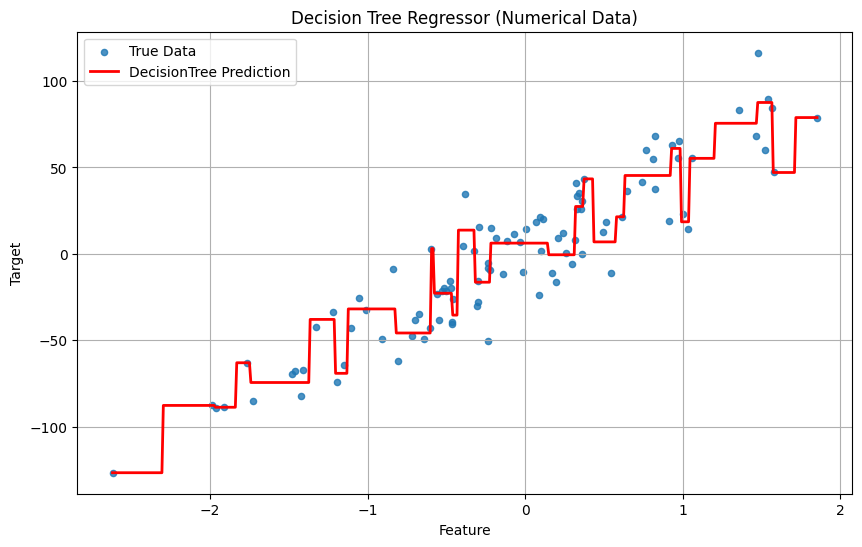

DecisionTree Regressor MSE on training data: 136.81

--- Testing DecisionTree Classifier (Numerical Data) ---
  Building node at depth 0. Samples: 100, Unique Y: [0 1]
  Trying to find best split for node with 100 samples.
    Checking feature 0 (is numerical: True). Unique values: [-0.85852241 -0.77719676 -0.40020814 -0.22595246 -0.21198653 -0.08239154
 -0.00832267  0.01258051  0.09145925  0.094903    0.10320711  0.12437227
  0.15559223  0.22485502  0.24802757  0.33958117  0.37705866  0.37878997
  0.3808594   0.46010921  0.47335819  0.48727907  0.51142713  0.53358465
  0.55656344  0.57357881  0.57885884  0.58590018  0.59137345  0.60046915
  0.63356167  0.63944087  0.64569333  0.67963113  0.69840909  0.7114472
  0.7314302   0.73254597  0.73375167  0.73455812  0.73902766  0.76361798
  0.76916909  0.77018374  0.78779153  0.80375081  0.85095512  0.87717639
  0.87971932  0.88259274  1.00183089  1.00459142  1.01215141  1.03307436
  1.04031359  1.04578316  1.04598687  1.07746664  1.09821151 

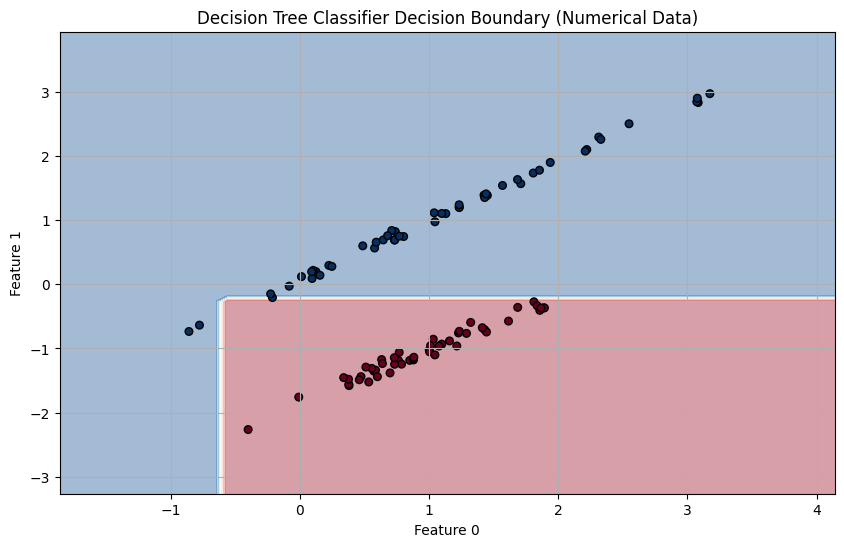


--- Testing DecisionTree with Mixed (Numerical + Categorical) Data ---
  Building node at depth 0. Samples: 20, Unique Y: [0 1]
  Trying to find best split for node with 20 samples.
    Checking feature 0 (is numerical: True). Unique values: [10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0 65.0 70.0 75.0
 80.0 85.0 90.0 95.0 100.0 105.0]
      Num Split: Feat 0, Thresh 12.50, Gain 0.0263
      Num Split: Feat 0, Thresh 17.50, Gain 0.0000
      Num Split: Feat 0, Thresh 22.50, Gain 0.0098
      Num Split: Feat 0, Thresh 27.50, Gain 0.0000
      Num Split: Feat 0, Thresh 32.50, Gain 0.0067
      Num Split: Feat 0, Thresh 37.50, Gain 0.0000
      Num Split: Feat 0, Thresh 42.50, Gain 0.0055
      Num Split: Feat 0, Thresh 47.50, Gain 0.0000
      Num Split: Feat 0, Thresh 52.50, Gain 0.0051
      Num Split: Feat 0, Thresh 57.50, Gain 0.0000
      Num Split: Feat 0, Thresh 62.50, Gain 0.0051
      Num Split: Feat 0, Thresh 67.50, Gain 0.0000
      Num Split: Feat 0, Thresh 72.50, G

C:\Users\vumma\AppData\Local\Temp\ipykernel_31128\3512326283.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_categories))


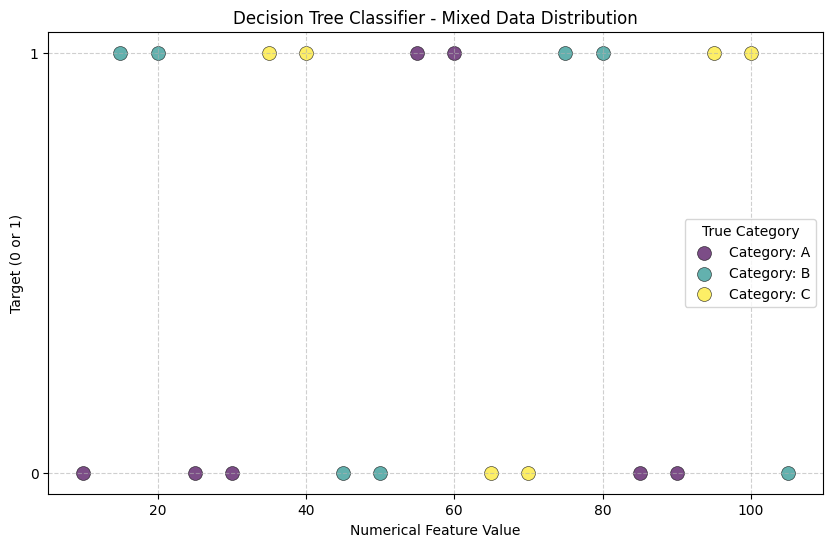


--- Testing Loss Functions (MSELoss & LogLoss) ---
y_true (Regression): [10. 20. 30. 40. 50.]
y_pred (Regression): [11. 19. 32. 38. 49.]
MSE Loss: 2.2000
MSE Gradient: [ 1. -1.  2. -2. -1.]
MSE Hessian: [1. 1. 1. 1. 1.]

--- LogLoss Test ---
y_true (Classification): [0 1 0 1 0]
y_pred_raw (Classification): [-1.   2.  -0.5  1.5  0. ]
Sigmoid(y_pred_raw): [0.2689 0.8808 0.3775 0.8176 0.5   ]
LogLoss: 0.3618
LogLoss Gradient: [ 0.2689 -0.1192  0.3775 -0.1824  0.5   ]
LogLoss Hessian: [0.1966 0.105  0.235  0.1491 0.25  ]

--- Testing GradientBooster Regressor ---
  Building node at depth 0. Samples: 100, Unique Y: [-124.13947284  -86.54518101  -85.95021608  -85.19081146  -82.61922218
  -79.90201636  -71.70368639  -66.91603055  -65.36716636  -64.81668273
  -61.51590309  -60.49788061  -59.31112577  -47.65504072  -46.9721773
  -46.83171602  -45.19294464  -40.16432028  -40.11858674  -39.8938203
  -38.22980894  -36.7274038   -35.78932111  -35.66546388  -32.18089612
  -30.9231768   -30.15721126

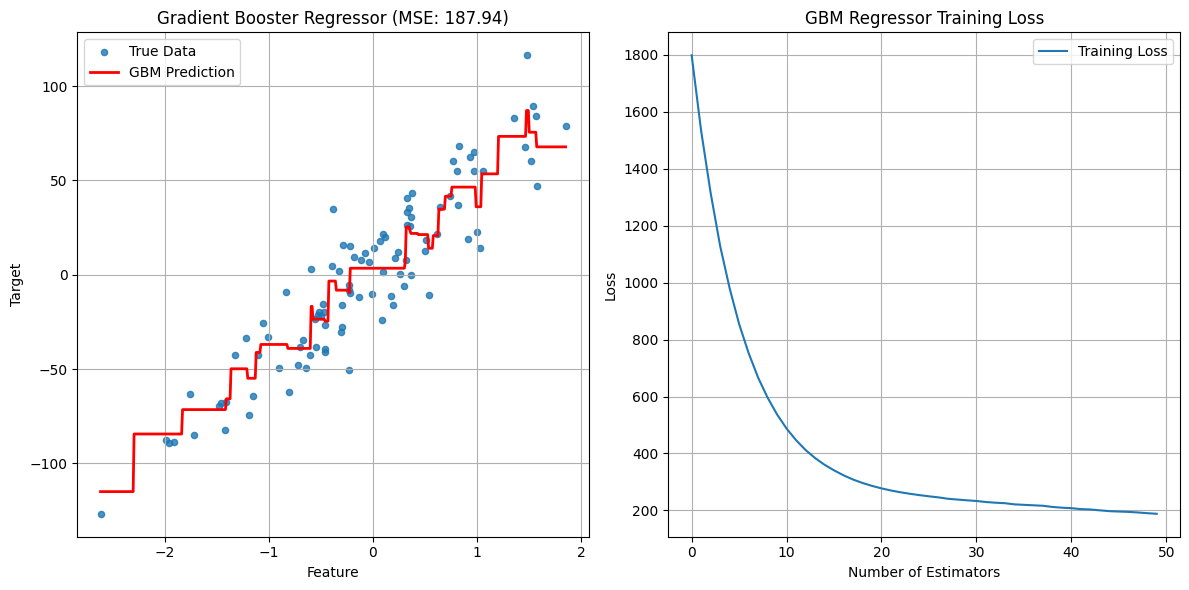

GradientBooster Regressor final MSE on training data: 187.94

--- Testing GradientBooster Classifier ---
  Building node at depth 0. Samples: 100, Unique Y: [-0.5  0.5]
  Trying to find best split for node with 100 samples.
    Checking feature 0 (is numerical: True). Unique values: [-0.85852241 -0.77719676 -0.40020814 -0.22595246 -0.21198653 -0.08239154
 -0.00832267  0.01258051  0.09145925  0.094903    0.10320711  0.12437227
  0.15559223  0.22485502  0.24802757  0.33958117  0.37705866  0.37878997
  0.3808594   0.46010921  0.47335819  0.48727907  0.51142713  0.53358465
  0.55656344  0.57357881  0.57885884  0.58590018  0.59137345  0.60046915
  0.63356167  0.63944087  0.64569333  0.67963113  0.69840909  0.7114472
  0.7314302   0.73254597  0.73375167  0.73455812  0.73902766  0.76361798
  0.76916909  0.77018374  0.78779153  0.80375081  0.85095512  0.87717639
  0.87971932  0.88259274  1.00183089  1.00459142  1.01215141  1.03307436
  1.04031359  1.04578316  1.04598687  1.07746664  1.09821151

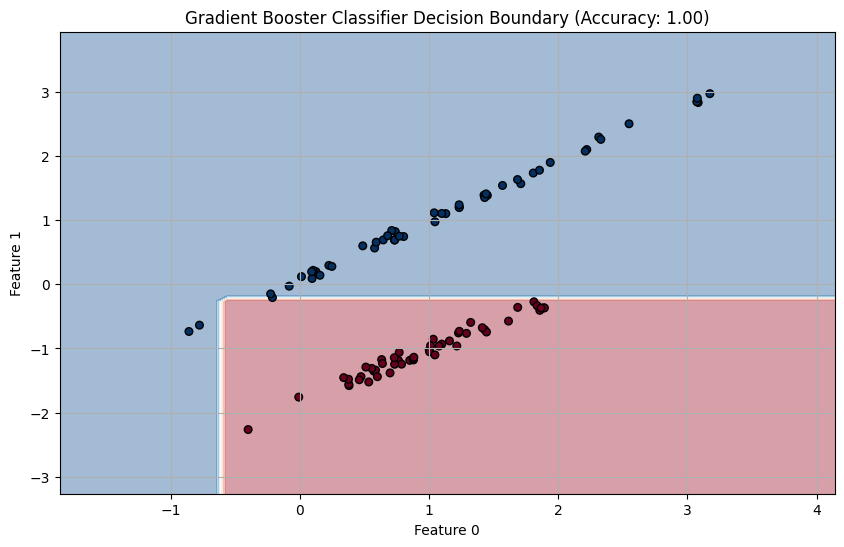

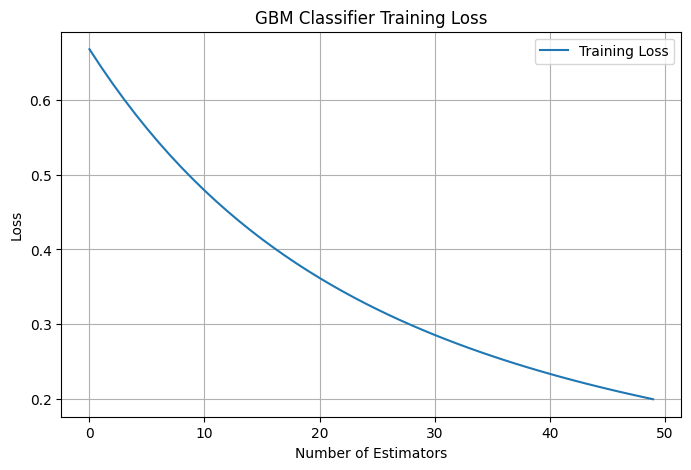


--- Testing GradientBooster with Mixed (Numerical + Categorical) Data ---
  Building node at depth 0. Samples: 20, Unique Y: [-0.5  0.5]
  Trying to find best split for node with 20 samples.
    Checking feature 0 (is numerical: True). Unique values: [10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0 65.0 70.0 75.0
 80.0 85.0 90.0 95.0 100.0 105.0]
      Num Split: Feat 0, Thresh 12.50, Gain 0.0132
      Num Split: Feat 0, Thresh 17.50, Gain 0.0000
      Num Split: Feat 0, Thresh 22.50, Gain 0.0049
      Num Split: Feat 0, Thresh 27.50, Gain 0.0000
      Num Split: Feat 0, Thresh 32.50, Gain 0.0033
      Num Split: Feat 0, Thresh 37.50, Gain 0.0000
      Num Split: Feat 0, Thresh 42.50, Gain 0.0027
      Num Split: Feat 0, Thresh 47.50, Gain 0.0000
      Num Split: Feat 0, Thresh 52.50, Gain 0.0025
      Num Split: Feat 0, Thresh 57.50, Gain 0.0000
      Num Split: Feat 0, Thresh 62.50, Gain 0.0025
      Num Split: Feat 0, Thresh 67.50, Gain 0.0000
      Num Split: Feat 0, Thresh

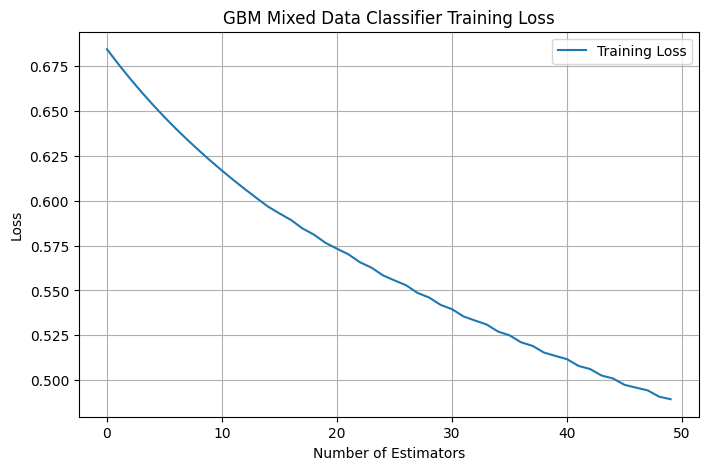

In [3]:
# notebooks/demo.ipynb

# --- Imports and Path Setup (MUST be at the very top) ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split # Keep this, needed for regular train/test splits if used
import pandas as pd
import os # For os.getcwd() in debug prints

import sys
# Path setup MUST come before your local imports
print(f"Current working directory: {os.getcwd()}") # Debug print
print(f"sys.path BEFORE append: {sys.path}")      # Debug print
sys.path.append('../') # This adds the parent directory (your project root) to Python's search path
print(f"sys.path AFTER append: {sys.path}")       # Debug print

# --- Force Module Reload (NEW ADDITION) ---
# This block helps with stubborn caching issues.
import importlib 
print("Attempting to reload custom modules...")
try:
    # Use full module paths for reloading
    # Note: If you renamed booster.py earlier, ensure this line reflects the new name (e.g., booster_new)
    # If it's still booster.py, keep it as booster.
    importlib.reload(sys.modules['boosting_from_scratch.tree'])
    importlib.reload(sys.modules['boosting_from_scratch.loss'])
    importlib.reload(sys.modules['boosting_from_scratch.booster']) # Or boosting_from_scratch.booster_new
    print("Modules reloaded successfully from disk!")
except KeyError as e:
    print(f"Could not reload module. It might not have been imported yet (expected for first run): {e}")
    print("This message is usually fine on first run after kernel restart.")
except Exception as e:
    print(f"An unexpected error occurred during reload: {e}")
# --- End Force Module Reload ---

# Now, import your custom classes (these rely on the path setup above)
# Ensure the correct name for booster is used here (booster or booster_new)
from boosting_from_scratch.tree import DecisionTree
from boosting_from_scratch.loss import MSELoss, LogLoss, sigmoid
from boosting_from_scratch.booster import GradientBooster # Or from boosting_from_scratch.booster_new import GradientBooster


print("\n--- Testing DecisionTree Regressor (Numerical Data) ---")

# 1. Generate simple toy regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_reg = X_reg.reshape(-1, 1) # Ensure X is 2D

# Create a test set for visualization
X_test_reg = np.linspace(X_reg.min(), X_reg.max(), 500).reshape(-1, 1)

# Define feature types for the regressor (only one numerical feature)
my_regressor_feature_types = ['numerical']

# 2. Instantiate and fit DecisionTree Regressor
reg_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='regressor',
                        feature_types=my_regressor_feature_types)
reg_tree.fit(X_reg, y_reg)

# 3. Make predictions
y_pred_reg = reg_tree.predict(X_reg)
y_pred_test_reg = reg_tree.predict(X_test_reg)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, alpha=0.8, label='True Data')
plt.plot(X_test_reg, y_pred_test_reg, color='red', linestyle='-', linewidth=2, label='DecisionTree Prediction')
plt.title('Decision Tree Regressor (Numerical Data)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print MSE
mse = np.mean((y_reg - y_pred_reg)**2)
print(f"DecisionTree Regressor MSE on training data: {mse:.2f}")


print("\n--- Testing DecisionTree Classifier (Numerical Data) ---")

# 1. Generate simple toy classification data (2 numerical features)
X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                       n_clusters_per_class=1, random_state=42)

# Define feature types for the classifier (both are numerical)
my_classifier_feature_types = ['numerical', 'numerical']

# Instantiate and fit DecisionTree Classifier
clf_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='classifier',
                        feature_types=my_classifier_feature_types)
clf_tree.fit(X_clf, y_clf)

# Make predictions and calculate accuracy
y_pred_clf = clf_tree.predict(X_clf)
accuracy = np.mean(y_pred_clf == y_clf)
print(f"DecisionTree Classifier Accuracy on training data: {accuracy:.2f}")

# Plot decision boundary for 2D classification
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=30, edgecolor='k', cmap=plt.cm.RdBu)
plt.title('Decision Tree Classifier Decision Boundary (Numerical Data)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()


print("\n--- Testing DecisionTree with Mixed (Numerical + Categorical) Data ---")

# 1. Generate simple toy data with one numerical and one categorical feature
X_mixed_direct = np.array([
    [10.0, 'A'], [20.0, 'B'], [30.0, 'A'], [40.0, 'C'], [50.0, 'B'],
    [60.0, 'A'], [70.0, 'C'], [80.0, 'B'], [90.0, 'A'], [100.0, 'C'],
    [15.0, 'B'], [25.0, 'A'], [35.0, 'C'], [45.0, 'B'], [55.0, 'A'],
    [65.0, 'C'], [75.0, 'B'], [85.0, 'A'], [95.0, 'C'], [105.0, 'B']
], dtype=object)

y_mixed_direct = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                            1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=np.int32)

# Define feature types for this mixed dataset:
my_mixed_feature_types = ['numerical', 'categorical']

# Instantiate and fit DecisionTree Classifier for mixed data
categorical_clf_tree = DecisionTree(max_depth=3, min_samples_split=2, tree_type='classifier',
                                    feature_types=my_mixed_feature_types)
categorical_clf_tree.fit(X_mixed_direct, y_mixed_direct)

# Make predictions and calculate accuracy
y_pred_categorical = categorical_clf_tree.predict(X_mixed_direct)
accuracy_categorical = np.mean(y_pred_categorical == y_mixed_direct)
print(f"DecisionTree Classifier (Mixed Data) Accuracy on training data: {accuracy_categorical:.2f}")

# Plotting Mixed Data
plt.figure(figsize=(10, 6))
numerical_col = X_mixed_direct[:, 0]
categorical_col = X_mixed_direct[:, 1]
unique_categories = np.unique(categorical_col)
colors = plt.cm.get_cmap('viridis', len(unique_categories))

for i, category in enumerate(unique_categories):
    cat_mask = categorical_col == category
    plt.scatter(numerical_col[cat_mask], y_mixed_direct[cat_mask],
                color=colors(i), label=f'Category: {category}',
                s=100, alpha=0.7, edgecolors='k', linewidth=0.5)

plt.title('Decision Tree Classifier - Mixed Data Distribution')
plt.xlabel('Numerical Feature Value')
plt.ylabel('Target (0 or 1)')
plt.yticks([0, 1])
plt.legend(title="True Category")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


print("\n--- Testing Loss Functions (MSELoss & LogLoss) ---")

y_true_reg_loss = np.array([10.0, 20.0, 30.0, 40.0, 50.0])
y_pred_reg_loss = np.array([11.0, 19.0, 32.0, 38.0, 49.0])

mse_loss_fn = MSELoss()
loss_mse = mse_loss_fn.loss(y_true_reg_loss, y_pred_reg_loss)
grad_mse = mse_loss_fn.gradient(y_true_reg_loss, y_pred_reg_loss)
hess_mse = mse_loss_fn.hessian(y_true_reg_loss, y_pred_reg_loss)

print(f"y_true (Regression): {y_true_reg_loss}")
print(f"y_pred (Regression): {y_pred_reg_loss}")
print(f"MSE Loss: {loss_mse:.4f}")
print(f"MSE Gradient: {grad_mse}")
print(f"MSE Hessian: {hess_mse}")


print("\n--- LogLoss Test ---")
y_true_clf_loss = np.array([0, 1, 0, 1, 0]) # Binary true labels
y_pred_raw_clf_loss = np.array([-1.0, 2.0, -0.5, 1.5, 0.0]) # Raw predictions (log-odds)

log_loss_fn = LogLoss()
loss_log = log_loss_fn.loss(y_true_clf_loss, y_pred_raw_clf_loss)
grad_log = log_loss_fn.gradient(y_true_clf_loss, y_pred_raw_clf_loss)
hess_log = log_loss_fn.hessian(y_true_clf_loss, y_pred_raw_clf_loss)

print(f"y_true (Classification): {y_true_clf_loss}")
print(f"y_pred_raw (Classification): {y_pred_raw_clf_loss}")
print(f"Sigmoid(y_pred_raw): {sigmoid(y_pred_raw_clf_loss).round(4)}")
print(f"LogLoss: {loss_log:.4f}")
print(f"LogLoss Gradient: {grad_log.round(4)}")
print(f"LogLoss Hessian: {hess_log.round(4)}")


print("\n--- Testing GradientBooster Regressor ---")

# Instantiate and fit GradientBooster Regressor
gbm_reg = GradientBooster(n_estimators=50, learning_rate=0.1, max_depth=2,
                              loss_type='regressor', feature_types=my_regressor_feature_types)
gbm_reg.fit(X_reg, y_reg) # REMOVED validation_split

# Make predictions
y_pred_gbm_reg = gbm_reg.predict(X_reg)
y_pred_gbm_test_reg = gbm_reg.predict(X_test_reg)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Plot 1: Predictions
plt.scatter(X_reg, y_reg, s=20, alpha=0.8, label='True Data')
plt.plot(X_test_reg, y_pred_gbm_test_reg, color='red', linestyle='-', linewidth=2, label='GBM Prediction')
plt.title(f'Gradient Booster Regressor (MSE: {gbm_reg.train_loss_history[-1]:.2f})')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) # Plot 2: Training Loss History
plt.plot(gbm_reg.train_loss_history, label='Training Loss')
# REMOVED val_loss_history plotting
plt.title('GBM Regressor Training Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final MSE
final_mse_gbm = np.mean((y_reg - y_pred_gbm_reg)**2)
print(f"GradientBooster Regressor final MSE on training data: {final_mse_gbm:.2f}")
# REMOVED print of estimators trained


print("\n--- Testing GradientBooster Classifier ---")

# Instantiate and fit GradientBooster Classifier
gbm_clf = GradientBooster(n_estimators=50, learning_rate=0.1, max_depth=2,
                              loss_type='classifier', feature_types=my_classifier_feature_types)
gbm_clf.fit(X_clf, y_clf) # REMOVED validation_split

# Make predictions (probabilities for classifier)
y_pred_proba_gbm_clf = gbm_clf.predict(X_clf)
y_pred_class_gbm_clf = (y_pred_proba_gbm_clf > 0.5).astype(int) # Convert probabilities to binary classes

# Calculate and print accuracy
accuracy_gbm_clf = np.mean(y_pred_class_gbm_clf == y_clf)
print(f"GradientBooster Classifier Accuracy on training data: {accuracy_gbm_clf:.2f}")

# Plot decision boundary for 2D classification
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities over the meshgrid and classify
Z_proba = gbm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z_proba > 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=30, edgecolor='k', cmap=plt.cm.RdBu)
plt.title(f'Gradient Booster Classifier Decision Boundary (Accuracy: {accuracy_gbm_clf:.2f})')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()

# Plot Classifier Training Loss History
plt.figure(figsize=(8, 5))
plt.plot(gbm_clf.train_loss_history, label='Training Loss')
plt.title('GBM Classifier Training Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# --- Testing GradientBooster with Mixed (Numerical + Categorical) Data ---
print("\n--- Testing GradientBooster with Mixed (Numerical + Categorical) Data ---")

# Reuse existing mixed data (X_mixed_direct, y_mixed_direct from earlier cell)
# my_mixed_feature_types = ['numerical', 'categorical'] # Defined earlier

# Instantiate and fit GradientBooster Classifier for mixed data
gbm_mixed_clf = GradientBooster(n_estimators=50, learning_rate=0.1, max_depth=2,
                                loss_type='classifier', feature_types=my_mixed_feature_types)
gbm_mixed_clf.fit(X_mixed_direct, y_mixed_direct) # REMOVED validation_split

# Make predictions (probabilities for classifier)
y_pred_proba_gbm_mixed_clf = gbm_mixed_clf.predict(X_mixed_direct)
y_pred_class_gbm_mixed_clf = (y_pred_proba_gbm_mixed_clf > 0.5).astype(int)

# Calculate and print accuracy
accuracy_gbm_mixed_clf = np.mean(y_pred_class_gbm_mixed_clf == y_mixed_direct)
print(f"GradientBooster Classifier (Mixed Data) Accuracy on training data: {accuracy_gbm_mixed_clf:.2f}")

# Plot Training Loss History for Mixed Data Classifier
plt.figure(figsize=(8, 5))
plt.plot(gbm_mixed_clf.train_loss_history, label='Training Loss')
plt.title('GBM Mixed Data Classifier Training Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Current working directory: c:\Users\vumma\Documents\boosting_from_scratch_project\notebooks
sys.path BEFORE append: ['c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313', '', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32\\lib', 'C:\\Users\\vumma\\AppData\\Roaming\\Python\\Python313\\site-packages\\Pythonwin', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages', '../', '../', '../', '../', '../']
sys.path AFTER append: ['c:\\Users\\vumma\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\vumma\\AppData\\Local\\Programs\\Python

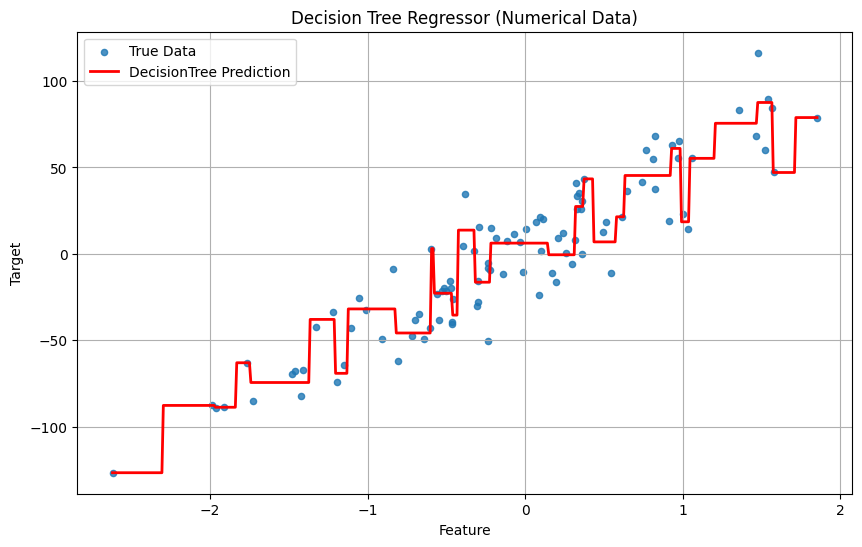

DecisionTree Regressor MSE on training data: 136.81

--- Testing DecisionTree Classifier (Numerical Data) ---
  Building node at depth 0. Samples: 100, Unique Y: [0 1]
  Trying to find best split for node with 100 samples.
    Checking feature 0 (is numerical: True). Unique values: [-0.85852241 -0.77719676 -0.40020814 -0.22595246 -0.21198653 -0.08239154
 -0.00832267  0.01258051  0.09145925  0.094903    0.10320711  0.12437227
  0.15559223  0.22485502  0.24802757  0.33958117  0.37705866  0.37878997
  0.3808594   0.46010921  0.47335819  0.48727907  0.51142713  0.53358465
  0.55656344  0.57357881  0.57885884  0.58590018  0.59137345  0.60046915
  0.63356167  0.63944087  0.64569333  0.67963113  0.69840909  0.7114472
  0.7314302   0.73254597  0.73375167  0.73455812  0.73902766  0.76361798
  0.76916909  0.77018374  0.78779153  0.80375081  0.85095512  0.87717639
  0.87971932  0.88259274  1.00183089  1.00459142  1.01215141  1.03307436
  1.04031359  1.04578316  1.04598687  1.07746664  1.09821151 

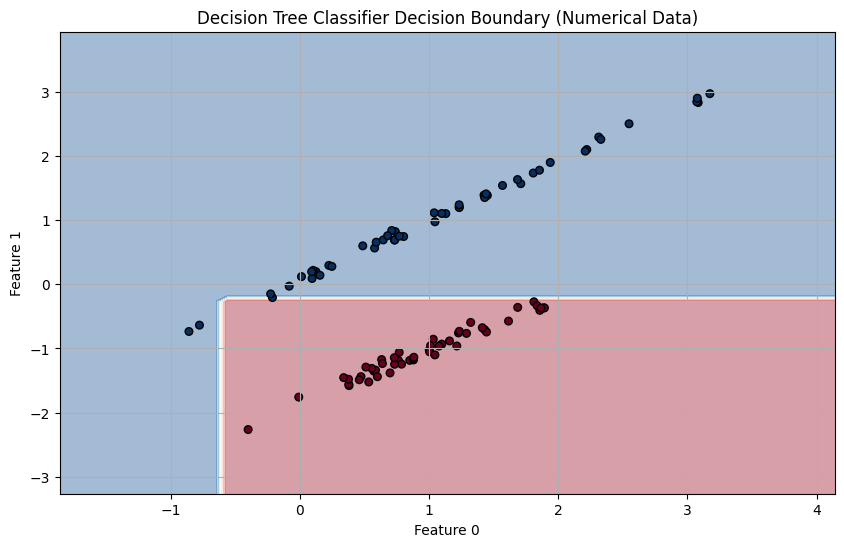


--- Testing DecisionTree with Mixed (Numerical + Categorical) Data ---
  Building node at depth 0. Samples: 20, Unique Y: [0 1]
  Trying to find best split for node with 20 samples.
    Checking feature 0 (is numerical: True). Unique values: [10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 55.0 60.0 65.0 70.0 75.0
 80.0 85.0 90.0 95.0 100.0 105.0]
      Num Split: Feat 0, Thresh 12.50, Gain 0.0263
      Num Split: Feat 0, Thresh 17.50, Gain 0.0000
      Num Split: Feat 0, Thresh 22.50, Gain 0.0098
      Num Split: Feat 0, Thresh 27.50, Gain 0.0000
      Num Split: Feat 0, Thresh 32.50, Gain 0.0067
      Num Split: Feat 0, Thresh 37.50, Gain 0.0000
      Num Split: Feat 0, Thresh 42.50, Gain 0.0055
      Num Split: Feat 0, Thresh 47.50, Gain 0.0000
      Num Split: Feat 0, Thresh 52.50, Gain 0.0051
      Num Split: Feat 0, Thresh 57.50, Gain 0.0000
      Num Split: Feat 0, Thresh 62.50, Gain 0.0051
      Num Split: Feat 0, Thresh 67.50, Gain 0.0000
      Num Split: Feat 0, Thresh 72.50, G

C:\Users\vumma\AppData\Local\Temp\ipykernel_31128\3650384292.py:148: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_categories))


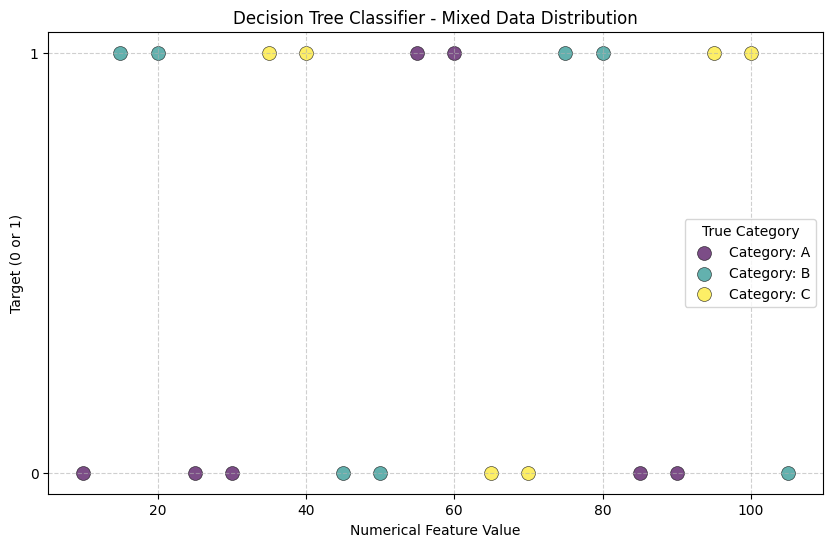


--- Testing Loss Functions (MSELoss & LogLoss) ---
y_true (Regression): [10. 20. 30. 40. 50.]
y_pred (Regression): [11. 19. 32. 38. 49.]
MSE Loss: 2.2000
MSE Gradient: [ 1. -1.  2. -2. -1.]
MSE Hessian: [1. 1. 1. 1. 1.]

--- LogLoss Test ---
y_true (Classification): [0 1 0 1 0]
y_pred_raw (Classification): [-1.   2.  -0.5  1.5  0. ]
Sigmoid(y_pred_raw): [0.2689 0.8808 0.3775 0.8176 0.5   ]
LogLoss: 0.3618
LogLoss Gradient: [ 0.2689 -0.1192  0.3775 -0.1824  0.5   ]
LogLoss Hessian: [0.1966 0.105  0.235  0.1491 0.25  ]

--- Testing GradientBooster Regressor (with Early Stopping) ---
  Building node at depth 0. Samples: 80, Unique Y: [-120.88806622  -83.29377439  -82.69880946  -81.93940484  -79.36781556
  -76.65060974  -68.45227977  -63.66462393  -62.11575975  -61.56527611
  -56.05971916  -44.4036341   -43.72077069  -43.58030941  -41.94153802
  -36.91291366  -36.86718012  -34.97840232  -32.5379145   -32.41405726
  -28.92948951  -26.90580464  -24.43398915  -22.10071203  -20.54667089
  -19

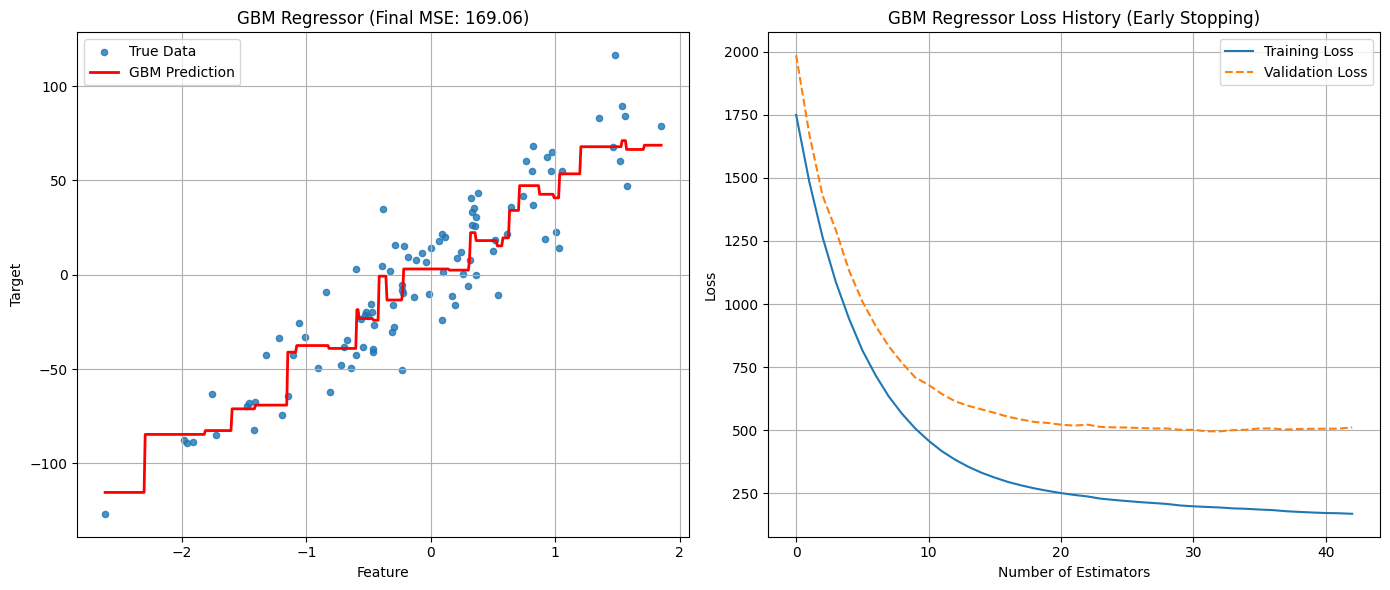

GradientBooster Regressor final MSE on training data: 237.52
Number of estimators trained: 43

--- Testing GradientBooster Classifier ---
  Building node at depth 0. Samples: 80, Unique Y: [-0.5  0.5]
  Trying to find best split for node with 80 samples.
    Checking feature 0 (is numerical: True). Unique values: [-0.85852241 -0.77719676 -0.22595246 -0.21198653  0.09145925  0.094903
  0.15559223  0.22485502  0.24802757  0.33958117  0.37705866  0.37878997
  0.3808594   0.47335819  0.48727907  0.51142713  0.53358465  0.55656344
  0.57357881  0.58590018  0.60046915  0.63356167  0.64569333  0.67963113
  0.69840909  0.7314302   0.73254597  0.73375167  0.73902766  0.76361798
  0.76916909  0.77018374  0.78779153  0.80375081  0.85095512  0.87717639
  0.88259274  1.00183089  1.00459142  1.04031359  1.04598687  1.07746664
  1.09821151  1.09891218  1.1586864   1.21530116  1.22831184  1.23332293
  1.23390668  1.23413512  1.2349949   1.29021194  1.32272135  1.41276704
  1.42586898  1.43085689  1.43

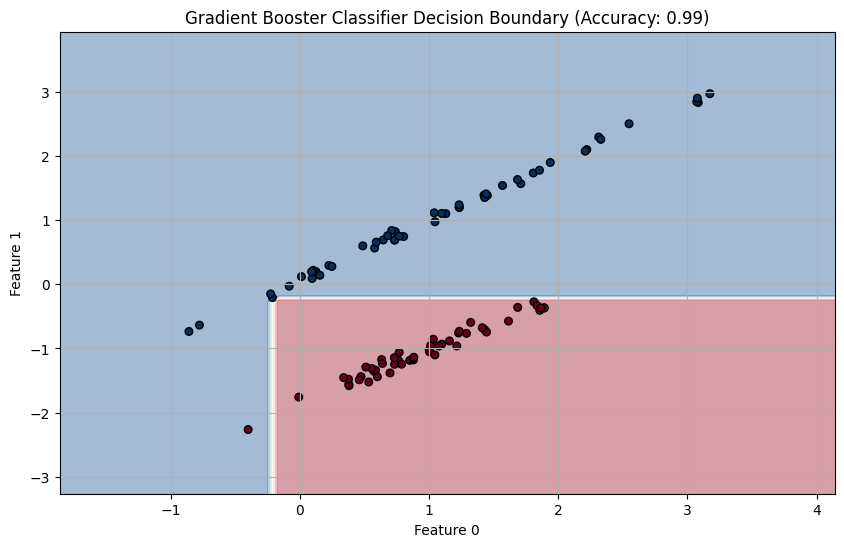

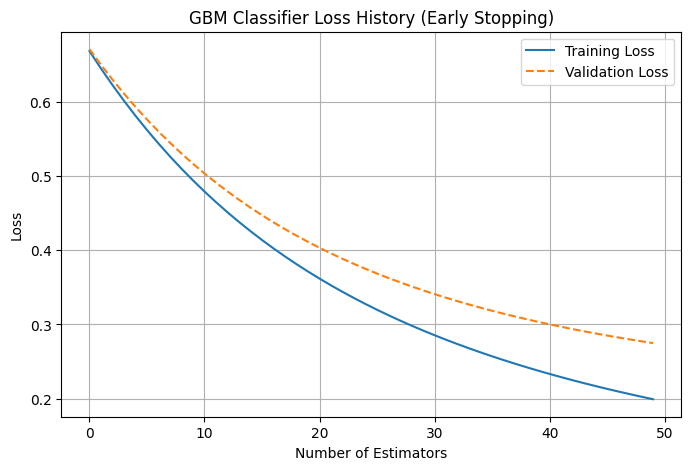


--- Testing GradientBooster with Mixed (Numerical + Categorical) Data ---
  Building node at depth 0. Samples: 16, Unique Y: [-0.5  0.5]
  Trying to find best split for node with 16 samples.
    Checking feature 0 (is numerical: True). Unique values: [10.0 15.0 20.0 25.0 30.0 40.0 50.0 55.0 65.0 75.0 80.0 85.0 90.0 95.0
 100.0 105.0]
      Num Split: Feat 0, Thresh 12.50, Gain 0.0167
      Num Split: Feat 0, Thresh 17.50, Gain 0.0000
      Num Split: Feat 0, Thresh 22.50, Gain 0.0064
      Num Split: Feat 0, Thresh 27.50, Gain 0.0000
      Num Split: Feat 0, Thresh 35.00, Gain 0.0045
      Num Split: Feat 0, Thresh 45.00, Gain 0.0000
      Num Split: Feat 0, Thresh 52.50, Gain 0.0040
      Num Split: Feat 0, Thresh 60.00, Gain 0.0000
      Num Split: Feat 0, Thresh 70.00, Gain 0.0040
      Num Split: Feat 0, Thresh 77.50, Gain 0.0000
      Num Split: Feat 0, Thresh 82.50, Gain 0.0045
      Num Split: Feat 0, Thresh 87.50, Gain 0.0000
      Num Split: Feat 0, Thresh 92.50, Gain 0.0064


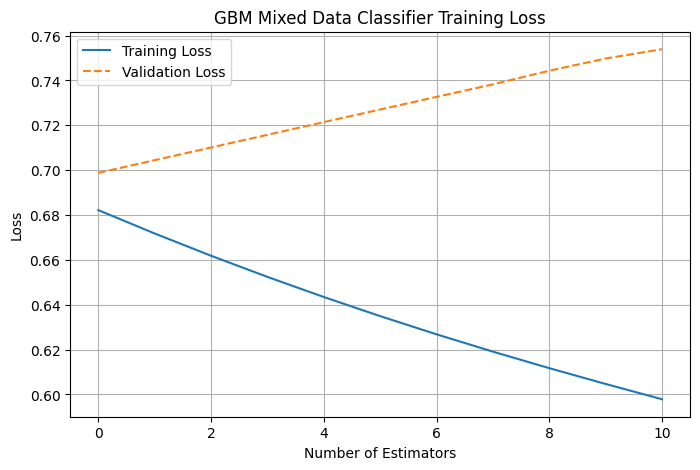

In [7]:
# notebooks/demo.ipynb

# --- Imports and Path Setup (MUST be at the very top) ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import os # For os.getcwd() in debug prints

import sys
# Path setup MUST come before your local imports
print(f"Current working directory: {os.getcwd()}") # Debug print
print(f"sys.path BEFORE append: {sys.path}")      # Debug print
sys.path.append('../') # This adds the parent directory (your project root) to Python's search path
print(f"sys.path AFTER append: {sys.path}")       # Debug print

# --- Force Module Reload (Ensures latest changes are picked up) ---
import importlib 
print("Attempting to reload custom modules...")
try:
    # Use full module paths for reloading
    # IMPORTANT: If you renamed booster.py earlier (e.g., to booster_new.py), adjust this import accordingly!
    importlib.reload(sys.modules['boosting_from_scratch.tree'])
    importlib.reload(sys.modules['boosting_from_scratch.loss'])
    importlib.reload(sys.modules['boosting_from_scratch.booster']) # Adjust if renamed (e.g., booster_new)
    print("Modules reloaded successfully from disk!")
except KeyError as e:
    print(f"Could not reload module. It might not have been imported yet (expected for first run): {e}")
    print("This message is usually fine on first run after kernel restart.")
except Exception as e:
    print(f"An unexpected error occurred during reload: {e}")
# --- End Force Module Reload ---

# Now, import your custom classes (these rely on the path setup above)
# IMPORTANT: Ensure the correct name for booster is used here (booster or booster_new)
from boosting_from_scratch.tree import DecisionTree
from boosting_from_scratch.loss import MSELoss, LogLoss, sigmoid
from boosting_from_scratch.booster import GradientBooster # Adjust if renamed (e.g., from boosting_from_scratch.booster_new import GradientBooster)


print("\n--- Testing DecisionTree Regressor (Numerical Data) ---")

# 1. Generate simple toy regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_reg = X_reg.reshape(-1, 1) # Ensure X is 2D

# Create a test set for visualization
X_test_reg = np.linspace(X_reg.min(), X_reg.max(), 500).reshape(-1, 1)

# Define feature types for the regressor (only one numerical feature)
my_regressor_feature_types = ['numerical']

# 2. Instantiate and fit DecisionTree Regressor
reg_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='regressor',
                        feature_types=my_regressor_feature_types)
reg_tree.fit(X_reg, y_reg)

# 3. Make predictions
y_pred_reg = reg_tree.predict(X_reg)
y_pred_test_reg = reg_tree.predict(X_test_reg)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, alpha=0.8, label='True Data')
plt.plot(X_test_reg, y_pred_test_reg, color='red', linestyle='-', linewidth=2, label='DecisionTree Prediction')
plt.title('Decision Tree Regressor (Numerical Data)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print MSE
mse = np.mean((y_reg - y_pred_reg)**2)
print(f"DecisionTree Regressor MSE on training data: {mse:.2f}")


print("\n--- Testing DecisionTree Classifier (Numerical Data) ---")

# 1. Generate simple toy classification data (2 numerical features)
X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                       n_clusters_per_class=1, random_state=42)

# Define feature types for the classifier (both are numerical)
my_classifier_feature_types = ['numerical', 'numerical']

# Instantiate and fit DecisionTree Classifier
clf_tree = DecisionTree(max_depth=5, min_samples_split=2, tree_type='classifier',
                        feature_types=my_classifier_feature_types)
clf_tree.fit(X_clf, y_clf)

# Make predictions and calculate accuracy
y_pred_clf = clf_tree.predict(X_clf)
accuracy = np.mean(y_pred_clf == y_clf)
print(f"DecisionTree Classifier Accuracy on training data: {accuracy:.2f}")

# Plot decision boundary for 2D classification
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=30, edgecolor='k', cmap=plt.cm.RdBu)
plt.title('Decision Tree Classifier Decision Boundary (Numerical Data)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()


print("\n--- Testing DecisionTree with Mixed (Numerical + Categorical) Data ---")

# 1. Generate simple toy data with one numerical and one categorical feature
X_mixed_direct = np.array([
    [10.0, 'A'], [20.0, 'B'], [30.0, 'A'], [40.0, 'C'], [50.0, 'B'],
    [60.0, 'A'], [70.0, 'C'], [80.0, 'B'], [90.0, 'A'], [100.0, 'C'],
    [15.0, 'B'], [25.0, 'A'], [35.0, 'C'], [45.0, 'B'], [55.0, 'A'],
    [65.0, 'C'], [75.0, 'B'], [85.0, 'A'], [95.0, 'C'], [105.0, 'B']
], dtype=object)

y_mixed_direct = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                            1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=np.int32)

# Define feature types for this mixed dataset:
my_mixed_feature_types = ['numerical', 'categorical']

# Instantiate and fit DecisionTree Classifier for mixed data
categorical_clf_tree = DecisionTree(max_depth=3, min_samples_split=2, tree_type='classifier',
                                    feature_types=my_mixed_feature_types)
categorical_clf_tree.fit(X_mixed_direct, y_mixed_direct)

# Make predictions and calculate accuracy
y_pred_categorical = categorical_clf_tree.predict(X_mixed_direct)
accuracy_categorical = np.mean(y_pred_categorical == y_mixed_direct)
print(f"DecisionTree Classifier (Mixed Data) Accuracy on training data: {accuracy_categorical:.2f}")

# Plotting Mixed Data
plt.figure(figsize=(10, 6))
numerical_col = X_mixed_direct[:, 0]
categorical_col = X_mixed_direct[:, 1]
unique_categories = np.unique(categorical_col)
colors = plt.cm.get_cmap('viridis', len(unique_categories))

for i, category in enumerate(unique_categories):
    cat_mask = categorical_col == category
    plt.scatter(numerical_col[cat_mask], y_mixed_direct[cat_mask],
                color=colors(i), label=f'Category: {category}',
                s=100, alpha=0.7, edgecolors='k', linewidth=0.5)

plt.title('Decision Tree Classifier - Mixed Data Distribution')
plt.xlabel('Numerical Feature Value')
plt.ylabel('Target (0 or 1)')
plt.yticks([0, 1])
plt.legend(title="True Category")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


print("\n--- Testing Loss Functions (MSELoss & LogLoss) ---")

y_true_reg_loss = np.array([10.0, 20.0, 30.0, 40.0, 50.0])
y_pred_reg_loss = np.array([11.0, 19.0, 32.0, 38.0, 49.0])

mse_loss_fn = MSELoss()
loss_mse = mse_loss_fn.loss(y_true_reg_loss, y_pred_reg_loss)
grad_mse = mse_loss_fn.gradient(y_true_reg_loss, y_pred_reg_loss)
hess_mse = mse_loss_fn.hessian(y_true_reg_loss, y_pred_reg_loss)

print(f"y_true (Regression): {y_true_reg_loss}")
print(f"y_pred (Regression): {y_pred_reg_loss}")
print(f"MSE Loss: {loss_mse:.4f}")
print(f"MSE Gradient: {grad_mse}")
print(f"MSE Hessian: {hess_mse}")


print("\n--- LogLoss Test ---")
y_true_clf_loss = np.array([0, 1, 0, 1, 0]) # Binary true labels
y_pred_raw_clf_loss = np.array([-1.0, 2.0, -0.5, 1.5, 0.0]) # Raw predictions (log-odds)

log_loss_fn = LogLoss()
loss_log = log_loss_fn.loss(y_true_clf_loss, y_pred_raw_clf_loss)
grad_log = log_loss_fn.gradient(y_true_clf_loss, y_pred_raw_clf_loss)
hess_log = log_loss_fn.hessian(y_true_clf_loss, y_pred_raw_clf_loss)

print(f"y_true (Classification): {y_true_clf_loss}")
print(f"y_pred_raw (Classification): {y_pred_raw_clf_loss}")
print(f"Sigmoid(y_pred_raw): {sigmoid(y_pred_raw_clf_loss).round(4)}")
print(f"LogLoss: {loss_log:.4f}")
print(f"LogLoss Gradient: {grad_log.round(4)}")
print(f"LogLoss Hessian: {hess_log.round(4)}")


print("\n--- Testing GradientBooster Regressor (with Early Stopping) ---") # Section Title Changed Here

# Instantiate and fit GradientBooster Regressor with Early Stopping parameters
# Set a higher n_estimators than patience to allow early stopping to occur
gbm_reg = GradientBooster(n_estimators=100, learning_rate=0.1, max_depth=2,
                              loss_type='regressor', feature_types=my_regressor_feature_types,
                              early_stopping_rounds=10, min_delta=0.01) # NEW: Early Stopping Params

# Pass a validation split to the fit method
gbm_reg.fit(X_reg, y_reg, validation_split=0.2) # NEW: Use validation_split

# Make predictions (use original X_reg for full training data prediction)
y_pred_gbm_reg = gbm_reg.predict(X_reg)
y_pred_gbm_test_reg = gbm_reg.predict(X_test_reg)

# Plot the results
plt.figure(figsize=(14, 6)) # Increased figure size for two plots

plt.subplot(1, 2, 1) # Plot 1: Predictions
plt.scatter(X_reg, y_reg, s=20, alpha=0.8, label='True Data')
plt.plot(X_test_reg, y_pred_gbm_test_reg, color='red', linestyle='-', linewidth=2, label='GBM Prediction')
plt.title(f'GBM Regressor (Final MSE: {gbm_reg.train_loss_history[-1]:.2f})')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) # Plot 2: Training and Validation Loss History
plt.plot(gbm_reg.train_loss_history, label='Training Loss')
if gbm_reg.val_loss_history: # Only plot validation loss if it exists
    plt.plot(gbm_reg.val_loss_history, label='Validation Loss', linestyle='--')
plt.title('GBM Regressor Loss History (Early Stopping)')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final MSE
final_mse_gbm = np.mean((y_reg - y_pred_gbm_reg)**2)
print(f"GradientBooster Regressor final MSE on training data: {final_mse_gbm:.2f}")
print(f"Number of estimators trained: {len(gbm_reg.estimators)}") # NEW: Show how many trees were trained


print("\n--- Testing GradientBooster Classifier ---")

# Instantiate and fit GradientBooster Classifier
gbm_clf = GradientBooster(n_estimators=50, learning_rate=0.1, max_depth=2,
                              loss_type='classifier', feature_types=my_classifier_feature_types,
                              early_stopping_rounds=10, min_delta=0.01) # ADDED EARLY STOPPING PARAMS HERE TOO
gbm_clf.fit(X_clf, y_clf, validation_split=0.2) # ADDED validation_split HERE TOO

# Make predictions (probabilities for classifier)
y_pred_proba_gbm_clf = gbm_clf.predict(X_clf)
y_pred_class_gbm_clf = (y_pred_proba_gbm_clf > 0.5).astype(int) # Convert probabilities to binary classes

# Calculate and print accuracy
accuracy_gbm_clf = np.mean(y_pred_class_gbm_clf == y_clf)
print(f"GradientBooster Classifier Accuracy on training data: {accuracy_gbm_clf:.2f}")

# Plot decision boundary for 2D classification
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities over the meshgrid and classify
Z_proba = gbm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z_proba > 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=30, edgecolor='k', cmap=plt.cm.RdBu)
plt.title(f'Gradient Booster Classifier Decision Boundary (Accuracy: {accuracy_gbm_clf:.2f})')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()

# Plot Classifier Training Loss History
plt.figure(figsize=(8, 5))
plt.plot(gbm_clf.train_loss_history, label='Training Loss')
if gbm_clf.val_loss_history: # Only plot validation loss if it exists
    plt.plot(gbm_clf.val_loss_history, label='Validation Loss', linestyle='--')
plt.title('GBM Classifier Loss History (Early Stopping)')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# --- Testing GradientBooster with Mixed (Numerical + Categorical) Data ---
print("\n--- Testing GradientBooster with Mixed (Numerical + Categorical) Data ---")

# Reuse existing mixed data (X_mixed_direct, y_mixed_direct from earlier cell)
# my_mixed_feature_types = ['numerical', 'categorical'] # Defined earlier

# Instantiate and fit GradientBooster Classifier for mixed data
gbm_mixed_clf = GradientBooster(n_estimators=50, learning_rate=0.1, max_depth=2,
                                loss_type='classifier', feature_types=my_mixed_feature_types,
                                early_stopping_rounds=10, min_delta=0.01) # ADDED EARLY STOPPING PARAMS HERE TOO
gbm_mixed_clf.fit(X_mixed_direct, y_mixed_direct, validation_split=0.2) # ADDED validation_split HERE TOO

# Make predictions (probabilities for classifier)
y_pred_proba_gbm_mixed_clf = gbm_mixed_clf.predict(X_mixed_direct)
y_pred_class_gbm_mixed_clf = (y_pred_proba_gbm_mixed_clf > 0.5).astype(int)

# Calculate and print accuracy
accuracy_gbm_mixed_clf = np.mean(y_pred_class_gbm_mixed_clf == y_mixed_direct)
print(f"GradientBooster Classifier (Mixed Data) Accuracy on training data: {accuracy_gbm_mixed_clf:.2f}")

# Plot Training Loss History for Mixed Data Classifier
plt.figure(figsize=(8, 5))
plt.plot(gbm_mixed_clf.train_loss_history, label='Training Loss')
if gbm_mixed_clf.val_loss_history: # Only plot validation loss if it exists
    plt.plot(gbm_mixed_clf.val_loss_history, label='Validation Loss', linestyle='--')
plt.title('GBM Mixed Data Classifier Training Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


--- Testing Feature Importance ---


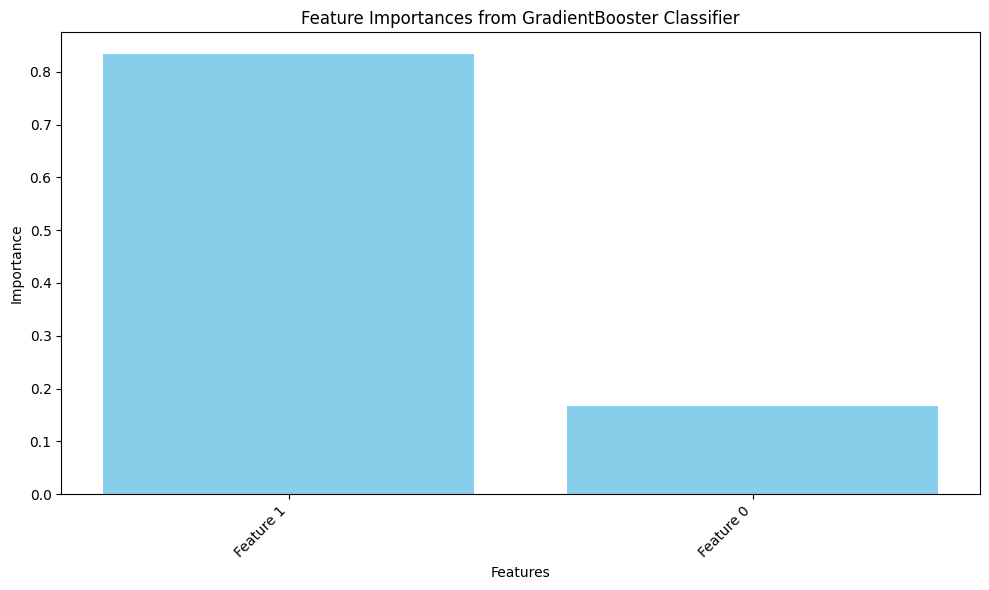

Calculated Feature Importances:
- Feature 1: 0.8330
- Feature 0: 0.1670

--- Feature Importance for Mixed Data Classifier ---


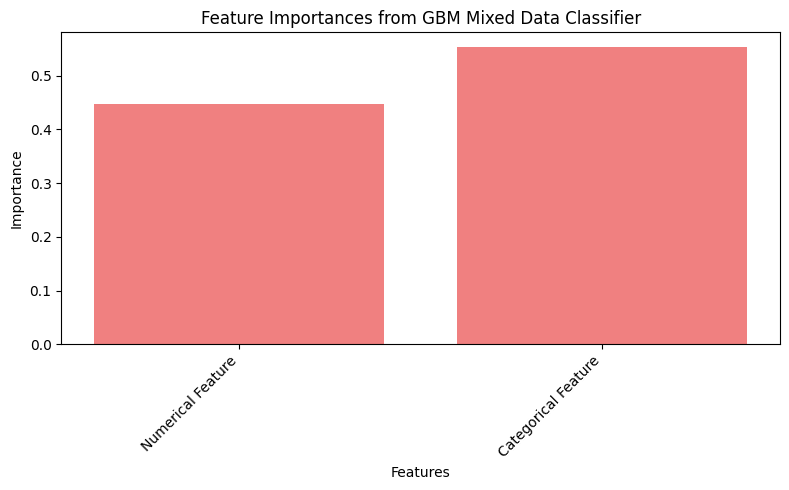

Calculated Feature Importances (Mixed Data):
- Numerical Feature: 0.4467
- Categorical Feature: 0.5533


In [14]:
# notebooks/demo.ipynb (in a new cell, at the very end)

print("\n--- Testing Feature Importance ---")

# We'll use the already trained gbm_clf (GradientBooster Classifier, numerical data)
# Make sure gbm_clf has been fitted in a previous cell (by running all cells)

if gbm_clf.feature_importances_ is not None:
    feature_importances = gbm_clf.feature_importances_
    n_features = len(feature_importances)
    feature_names = [f'Feature {i}' for i in range(n_features)] # Generic names

    # Sort features by importance for better visualization
    sorted_indices = np.argsort(feature_importances)[::-1] # Sort descending
    sorted_importances = feature_importances[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances from GradientBooster Classifier')
    plt.xticks(rotation=45, ha='right') # Rotate labels if needed
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    print("Calculated Feature Importances:")
    for name, importance in zip(sorted_feature_names, sorted_importances):
        print(f"- {name}: {importance:.4f}")
else:
    print("Feature importances not available (model might not have been fitted or no splits occurred).")

# --- Optional: Feature importance for Mixed Data Classifier ---
print("\n--- Feature Importance for Mixed Data Classifier ---")
if gbm_mixed_clf.feature_importances_ is not None:
    feature_importances_mixed = gbm_mixed_clf.feature_importances_
    n_features_mixed = len(feature_importances_mixed)
    # Use more descriptive names if you know them, e.g., ['numerical_feature', 'categorical_feature']
    feature_names_mixed = ['Numerical Feature', 'Categorical Feature'] 

    sorted_indices_mixed = np.argsort(feature_importances_mixed)[::-1]
    sorted_importances_mixed = feature_importances_mixed[sorted_indices]
    sorted_feature_names_mixed = [feature_names_mixed[i] for i in sorted_indices_mixed]

    plt.figure(figsize=(8, 5))
    plt.bar(sorted_feature_names_mixed, sorted_importances_mixed, color='lightcoral')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances from GBM Mixed Data Classifier')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("Calculated Feature Importances (Mixed Data):")
    for name, importance in zip(sorted_feature_names_mixed, sorted_importances_mixed):
        print(f"- {name}: {importance:.4f}")
else:
    print("Feature importances for mixed data not available.")